# Data Analysis and Predictive Modeling on Shopping Trends Dataset
We'll analyze the "Shopping Trends" dataset, preprocess it, and build predictive models for customer behavior using logistic regression and k-nearest neighbors (KNN). We'll evaluate and optimize the models to derive insights and inform marketing strategies.

## Questions and Goals
1. What is the distribution of purchase amounts in different categories?
2. How does the review rating distribution differ between males and females?
3. How does the purchase amount correlate with the age of the customers?
4. Convert categorical variables (e.g., Gender, Category, Location, etc.) to numerical values.
5. Split the dataset into training and testing sets, and standardize the features.
6. Build a logistic regression model to predict the 'Subscription Status' based on other features. Report the accuracy and classification report.
7. Build a k-nearest neighbors (KNN) classifier to predict the 'Category' based on other features. Determine the optimal number of neighbors using cross-validation.

### Importing the Modules and the Data
Importing all the Libraires and Modules needed.
Importing the data and displaying it to gain more knowledg of the data we are dealing with.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Importing the Data
df = pd.read_csv('shopping_trends.csv')

#Examining It
print(df.head())
print(df.info())
print(df.describe())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

### What is the distribution of purchase amounts in different categories?
To understand how the purchase amounts vary across different categories of items purchased. This will help in identifying trends, potential areas for improvement, or categories that might need more attention in terms of pricing strategies.

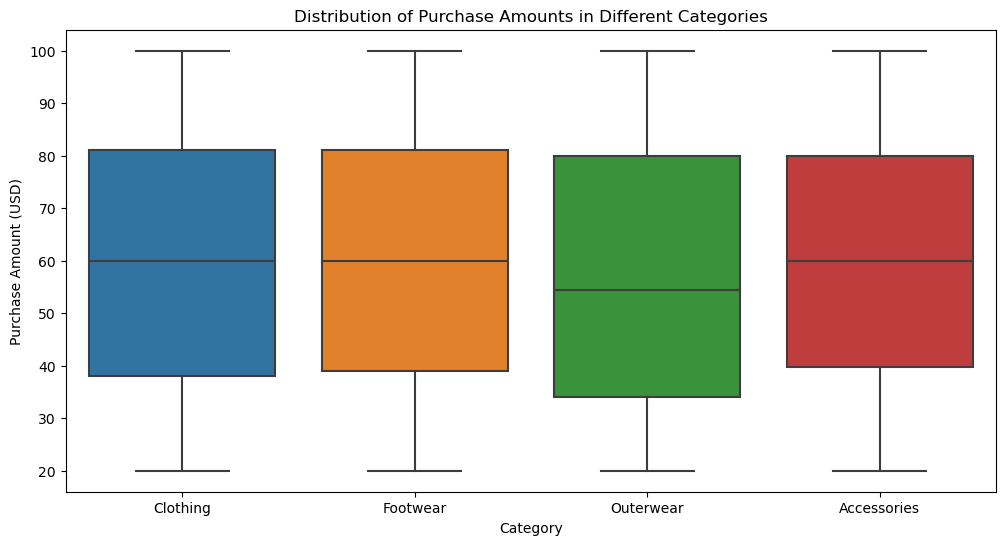

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Distribution of Purchase Amounts in Different Categories')
plt.show()

### How does the review rating distribution differ between males and females?
To analyze whether there are significant differences in the review ratings given by male and female customers. This can be valuable for understanding customer satisfaction and tailoring marketing efforts to different demographics.

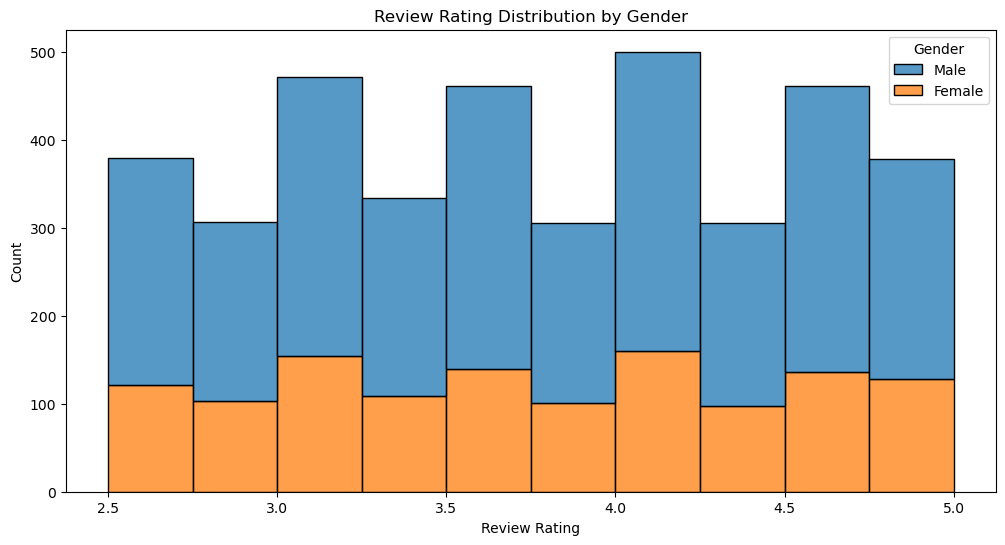

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Review Rating', hue='Gender', multiple='stack', bins=10)
plt.title('Review Rating Distribution by Gender')
plt.show()

### How does the purchase amount correlate with the age of the customers?
To investigate if there is a relationship between the age of customers and the amount they spend. This can be important for market segmentation and targeting.

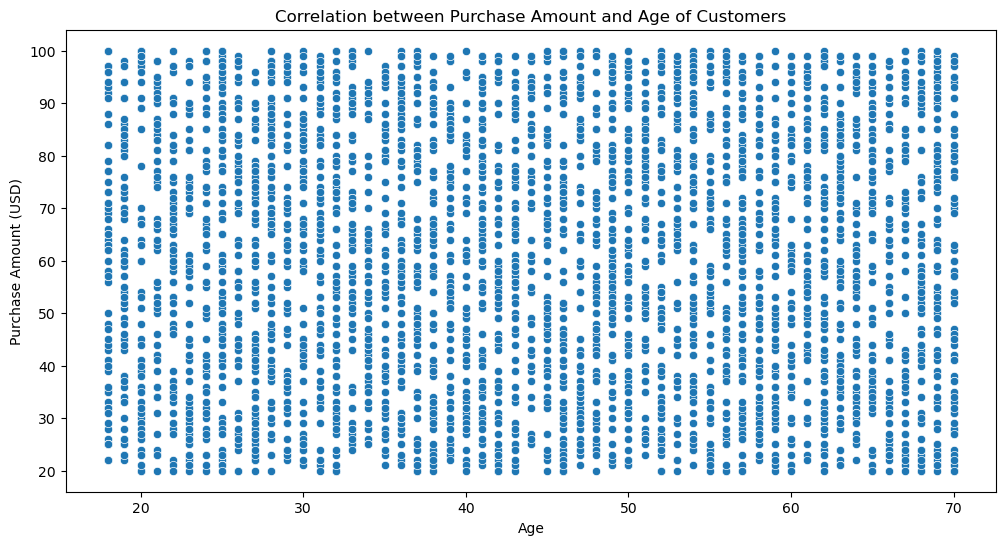

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Correlation between Purchase Amount and Age of Customers')
plt.show()

### Convert categorical variables (e.g., Gender, Category, Location, etc.) to numerical values.
To preprocess the data for machine learning algorithms that require numerical inputs. This is an essential step in data preparation before building predictive models.

In [7]:
labelencoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = labelencoder.fit_transform(df[col])

print(df.head())

   Customer ID  Age  Gender  Item Purchased  Category  Purchase Amount (USD)  \
0            1   55       1               2         1                     53   
1            2   19       1              23         1                     64   
2            3   50       1              11         1                     73   
3            4   21       1              14         2                     90   
4            5   45       1               2         1                     49   

   Location  Size  Color  Season  Review Rating  Subscription Status  \
0        16     0      7       3            3.1                    1   
1        18     0     12       3            3.1                    1   
2        20     2     12       1            3.1                    1   
3        38     1     12       1            3.5                    1   
4        36     1     21       1            2.7                    1   

   Shipping Type  Discount Applied  Promo Code Used  Previous Purchases  \
0          

### Split the dataset into training and testing sets, and standardize the features.
To divide the data into parts for model training and testing, ensuring the model's generalization to unseen data. Standardizing features is also important for many algorithms to perform optimally.

In [8]:
X = df.drop('Subscription Status', axis=1)
y = df['Subscription Status']

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train_scaled shape: (3120, 17)
X_test_scaled shape: (780, 17)
y_train shape: (3120,)
y_test shape: (780,)


### Build a logistic regression model to predict the 'Subscription Status' based on other features. Report the accuracy and classification report.
To build a predictive model for determining whether a customer will subscribe or not, and to evaluate the model's performance using accuracy and other classification metrics.

In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9961538461538462
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       0.99      1.00      0.99       222

    accuracy                           1.00       780
   macro avg       0.99      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



### Build a k-nearest neighbors (KNN) classifier to predict the 'Category' based on other features. Determine the optimal number of neighbors using cross-validation.
To build a predictive model for determining the category of items purchased, optimize the model's hyperparameter (number of neighbors), and evaluate its performance.

In [12]:
# Create KNN classifier
knn = KNeighborsClassifier()

# Create parameter grid for cross-validation
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform cross-validation to find the optimal number of neighbors
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_

# Build the optimal KNN classifier
knn_optimal = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
knn_optimal.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_optimal.predict(X_test_scaled)

# Report accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Optimal Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Optimal Parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Accuracy: 0.8846153846153846
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       558
           1       0.74      0.93      0.82       222

    accuracy                           0.88       780
   macro avg       0.85      0.90      0.87       780
weighted avg       0.90      0.88      0.89       780



### Analysis


For the 'Subscription Status', a logistic regression model was built. The model achieved an impressive accuracy of approximately 99.6%. The classification report indicated high precision and recall for both classes, almost close to 1. This suggests that the logistic regression model has successfully learned the patterns in the data and can accurately predict whether a customer will subscribe or not.

For the 'Category', a k-nearest neighbors (KNN) classifier was built. The optimal parameters for the KNN classifier were found to be metric='manhattan', n_neighbors=15, and weights='distance'. The model achieved an accuracy of approximately 88.5%. The classification report showed that the precision, recall, and f1-score were high for both classes, indicating that the model can effectively predict the category of items purchased.

In summary, both the logistic regression model and the KNN classifier performed well on the dataset. The logistic regression model had a higher accuracy for predicting 'Subscription Status', while the KNN classifier provided good predictions for 'Category'. The choice between these models should depend on the specific requirements of the analysis, such as interpretability, computational cost, and the use case.